# Paired T-test

Paired t-test or independant t-test is done to verify the effect of some change on the underlying value. It can be used for evaluating the effect of
some type of catalytic convertor on  the engine emission. Based on the test conducted on some set of vehicle before and after the use of pertiular type of cat,
we can check the improvement in the emission. The new cat can also deteriorate the engine emissions hence two tailed t test is conducted 

Note: data used here is imaginary due to confidentiality of data

We will start with imoprting important libraries.
   * numpy is used for basic mathematical calculations.
   * pandas is used for importing data in the tabular format i.e. dataframes.
   * seaborn is used for data visualization
   * Scipy is used for statistical analysis. We have used this to cross-verify our test results.



In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

%matplotlib inline

pandas' 'read_csv' method is used for importing csv file

In [152]:
data = pd.read_csv(r'C:\Users\Akash Agarwal\Desktop\Statistics\Data.csv',index_col = 'Sl.No.' )

In [153]:
data.head()

,Before training,Post training
Sl.No.,,
1,18,22
2,21,25
3,16,17
4,22,24
5,19,16


In [154]:
def data_visualise(data):
        dat = pd.DataFrame((pd.concat((data['Before training'],data['Post training'] ))), columns = ['value'])
        dat['after'] = 0
        dat['after'][data.shape[0]+1:] =1
        sns.boxplot(x = 'after', y = 'value', data = dat)


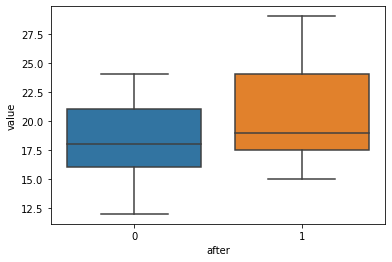

In [155]:
data_visualise(data)

In [156]:
data['dif'] = data['Post training']-data['Before training']

In [157]:
data_mean = data['dif'].mean()

In [158]:
data_std = data['dif'].std()

In [159]:
sample_std = data_std/np.sqrt(data.shape[0])

In [160]:
t = data_mean/sample_std

In [161]:
t

3.2312526655803127

In [162]:
p = scipy.stats.t.sf(x = 3.23, df = 19)*2     #two tailed t-test

In [163]:
p

0.004407344606290495

In [164]:
if p<.5:
    print('Cat is effective')
else:
    print('cat is not effective')

Cat is effective


**We can verify the results bu using scipy libraries in-built method for conducting paired-t test**

In [165]:
t, p =  scipy.stats.ttest_rel(a = data['Before training'], b = data['Post training'])

In [133]:
p

0.004394965993185664